In [1]:
import sys
import time
import numpy as np
import pandas as pd
import utils.samplefiles

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Start the stopwatch
script_start_time = time.time()

In [3]:
hdf_file_path = './output/example.hdf'
plot_path = './img/example.jpg'
# which sample is used to shown
sample_id = 0

In [4]:
data = utils.samplefiles.SampleFile()
data.read_hdf(hdf_file_path)

In [5]:
# when split_injections_noise is set to be True, GWs contain signals and pure waves are splited
df, noise = data.as_dataframe(injection_parameters=True, 
                  static_arguments=True, 
                  command_line_arguments=False, 
                  split_injections_noise=True)

In [6]:
print(df.columns)

Index(['approximant', 'bandpass_lower', 'bandpass_upper', 'coa_phase', 'dec',
       'delta_f', 'delta_t', 'distance', 'domain', 'event_time', 'f_lower',
       'fd_length', 'h1_output_signal', 'h1_signal', 'h1_snr', 'h1_strain',
       'inclination', 'injection_snr', 'l1_output_signal', 'l1_signal',
       'l1_snr', 'l1_strain', 'mass1', 'mass2', 'noise_interval_width',
       'original_sampling_rate', 'polarization', 'ra', 'sample_length',
       'scale_factor', 'seconds_after_event', 'seconds_before_event', 'spin1z',
       'spin2z', 'target_sampling_rate', 'td_length', 'tukey_alpha',
       'waveform_length', 'whitening_max_filter_duration',
       'whitening_segment_duration'],
      dtype='object')


In [7]:
print(df.injection_snr[sample_id])

8.0


In [8]:
print(df.mass1[sample_id])
print(df.mass2[sample_id])
print(df.spin1z[sample_id])
print(df.spin2z[sample_id])
print(df.scale_factor[sample_id])

30.0
45.0
-0.998
-0.998
0.021130220905045696


In [9]:
print(df.coa_phase[sample_id])
print(df.inclination[sample_id])
print(df.ra[sample_id])
print(df.dec[sample_id])
print(df.polarization[sample_id])

0.0
0.0
0.0
0.0
0.0


In [10]:
sample = df.loc[sample_id]

In [11]:
# Read out and construct some necessary values for plotting
seconds_before_event = float(sample['seconds_before_event'])
seconds_after_event = float(sample['seconds_after_event'])
target_sampling_rate = float(sample['target_sampling_rate'])
sample_length = float(sample['sample_length'])
print(seconds_before_event)
print(target_sampling_rate)
print(sample_length)

1.5
2048.0
2.0


In [12]:
# Create a grid on which the sample can be plotted so that the
# event_time is at position 0
grid = np.linspace(0 - seconds_before_event, 0 + seconds_after_event, int(target_sampling_rate * sample_length))

# for time from -0.15s to 0.05s
#grid = np.linspace(0 - seconds_before_event, 0 + seconds_after_event, int(target_sampling_rate * sample_length)+1)

In [13]:
det_name = 'H1'
det_string = 'h1_strain'

In [14]:
maximum = np.max(sample[det_string])
print(maximum)

140.15265


In [15]:
maximum = max(np.max(sample['h1_signal']), np.max(sample['l1_signal']))
print(maximum)

6.508376293417906e-21


In [16]:
maximum = max(np.max(sample['h1_output_signal']), np.max(sample['l1_output_signal']))
print(maximum)

35.53367122429326


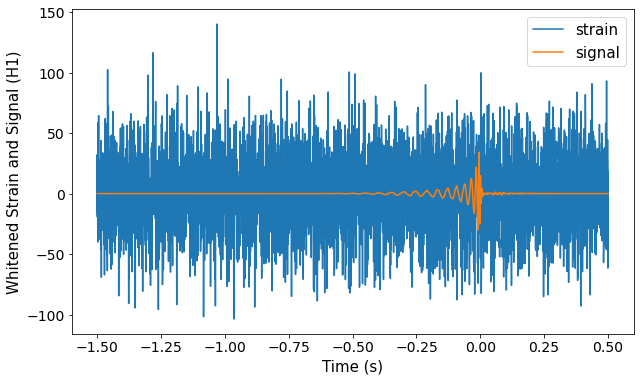

In [17]:
plt.plot(grid, sample[det_string], color='C0',label = 'strain')
plt.plot(grid, sample['h1_output_signal'], color='C1',label = 'signal')
#plt.xlim(-1.5, 0.5)
#plt.ylim(-150, 150)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Whitened Strain and Signal ({})'
                        .format(det_name), fontsize=15)
plt.xlabel('Time (s)', fontsize=15)
plt.legend(fontsize=15)

# Adjust the size and spacing of the subplots
plt.gcf().set_size_inches(9, 6, forward=True)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.subplots_adjust(wspace=0, hspace=0)

# plt.show()
plt.savefig(plot_path)